In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
training_data = pd.read_csv('train.csv'
)

In [3]:
training_data.shape

(1460, 81)

In [4]:
training_data.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Condition2', 'RoofMatl', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical', 'GarageQual', 'PoolQC', 'MiscFeature', 'HouseStyle'], inplace=True)
training_data = pd.get_dummies(training_data)
training_data.fillna(int(training_data["LotFrontage"].mean()), inplace=True)
training_data["TotalSF"] = training_data["1stFlrSF"] + training_data["2ndFlrSF"] + training_data["TotalBsmtSF"]
training_data.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)
unique_ms_subclass = list(pd.unique(training_data["MSSubClass"]))
for i in range(len(training_data)):
    training_data["MSSubClass"][i] = unique_ms_subclass.index(training_data["MSSubClass"][i])

C:\Users\arezz\AppData\Local\Temp\ipykernel_16276\3903730083.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data["MSSubClass"][i] = unique_ms_subclass.index(training_data["MSSubClass"][i])


In [5]:
X = training_data.drop(columns=['SalePrice', 'Id']).to_numpy()
Y = training_data["SalePrice"].to_numpy()

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=22)

In [7]:
scores = {}
for i in range(1,50):
    pls_model = PLSRegression(n_components=i)
    pls_model.fit(x_train, y_train)
    scores[f"{i}"] = pls_model.score(x_test,y_test)

In [8]:
pls_model = PLSRegression(n_components=2)
pls_model.fit(x_train, y_train)
pls_model.score(x_test,y_test)

0.8658119256813425

In [9]:
test_predictions = pls_model.predict(x_test)

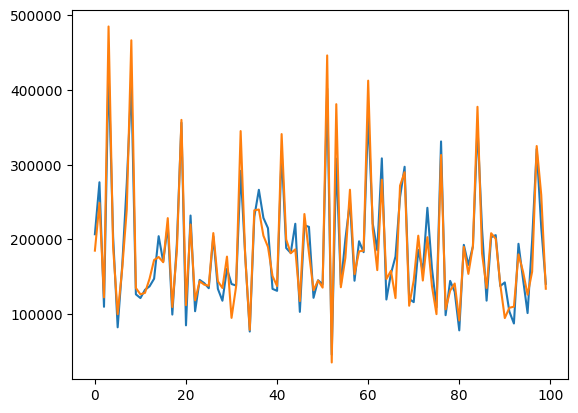

In [11]:
x_test_index = range(len(x_test[0:100]))
plt.plot(x_test_index, test_predictions[0:100], y_test[0:100])

In [12]:
# from joblib import dump

In [13]:
# dump(pls_model, 'house_price_pls.joblib')

In [14]:
df = pd.read_csv('test.csv')

In [15]:
df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Condition2', 'RoofMatl', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Heating', 'Electrical', 'GarageQual', 'PoolQC', 'MiscFeature', 'HouseStyle'], inplace=True)
df = pd.get_dummies(df)

In [16]:
train_cols = list(training_data.columns)

In [17]:
df.fillna(int(df["LotFrontage"].mean()), inplace=True)
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
df.drop(columns=['1stFlrSF', '2ndFlrSF'], inplace=True)
unique_ms_subclass = list(pd.unique(df["MSSubClass"]))
for i in range(len(df)):
    df["MSSubClass"][i] = unique_ms_subclass.index(df["MSSubClass"][i])

C:\Users\arezz\AppData\Local\Temp\ipykernel_16276\780775994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MSSubClass"][i] = unique_ms_subclass.index(df["MSSubClass"][i])


In [18]:
test_cols = list(df.columns)
not_in_test = [i for i in train_cols if i not in test_cols]

In [19]:
ids = df["Id"]
df.drop(columns=["Id"], inplace=True)
df = df.to_numpy()
predictions = pls_model.predict(df)

In [20]:
submission = pd.DataFrame()
submission["Id"] = ids
submission["SalePrice"] = predictions.flatten()
print(submission.head(10))

     Id      SalePrice
0  1461  104889.531629
1  1462  167235.103562
2  1463  178212.764705
3  1464  204200.248580
4  1465  199535.410199
5  1466  177841.271407
6  1467  175838.257646
7  1468  171403.196747
8  1469  181385.092986
9  1470  119534.407228


In [21]:
submission.to_csv('house_price_submission_pls.csv', index=False)